### Exemplo classificando Pinguins

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Importar os dados
df = pd.read_csv('penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [34]:
df.shape

(344, 7)

In [35]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [36]:
df = df.dropna()

In [37]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [38]:
features = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']
X = df[features]
y = df.species

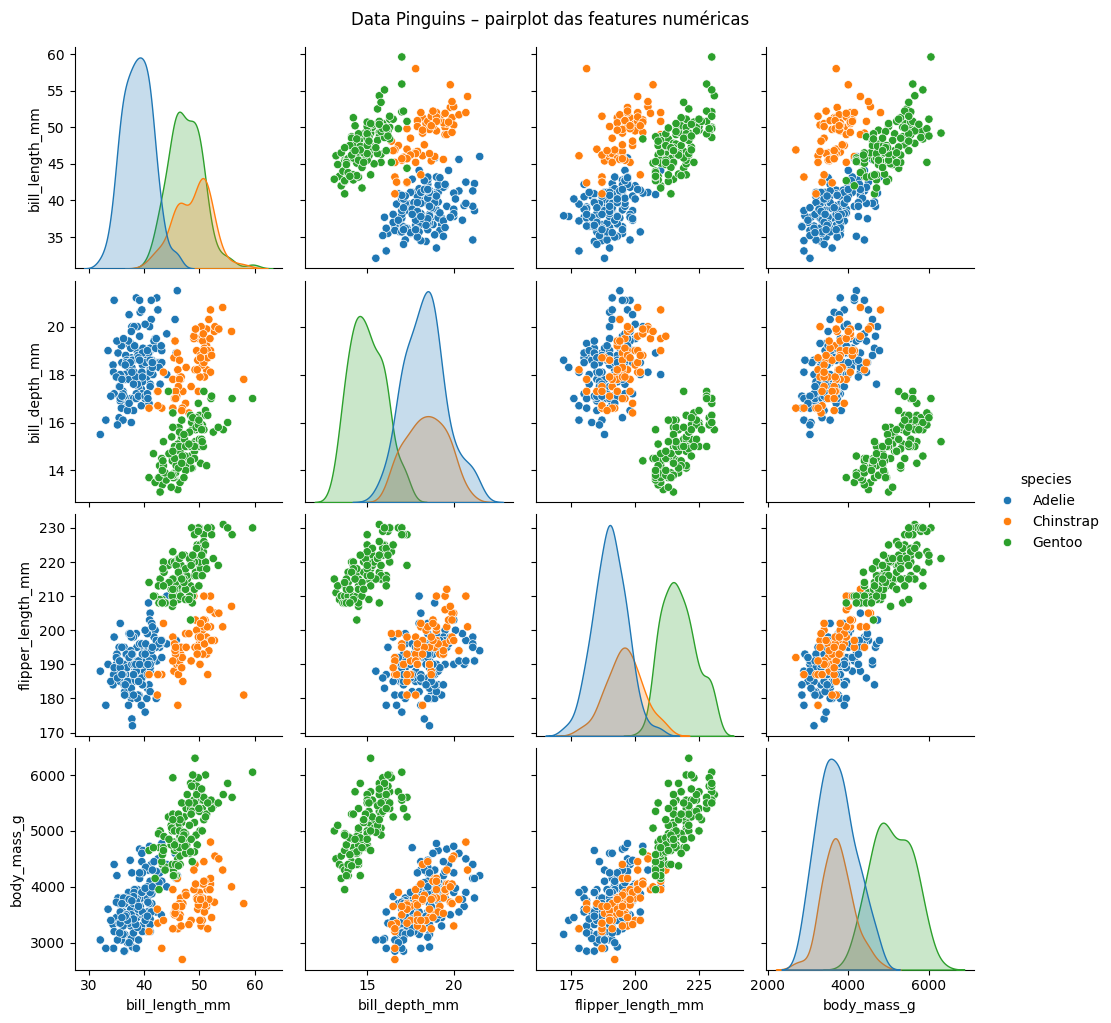

In [39]:
sns.pairplot(df,vars=features, hue='species')
plt.suptitle("Data Pinguins – pairplot das features numéricas", y=1.02)
plt.show()

In [40]:
from sklearn.model_selection import train_test_split

# Separação entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [41]:
from sklearn.preprocessing import MinMaxScaler

# Pré-processamento (Normalização)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# Criação do modelo

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [43]:
# Fazer previsões
y_pred = knn.predict(X_test_scaled)

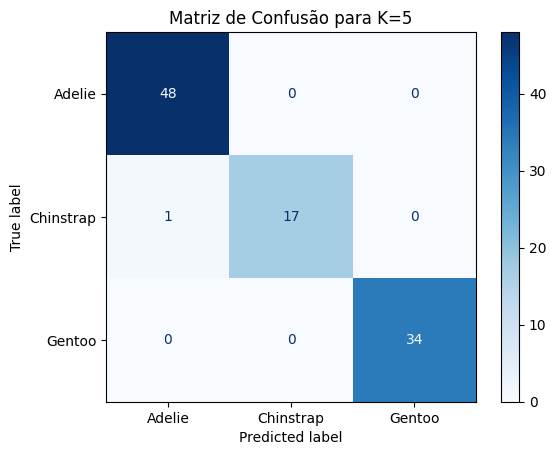

In [44]:
# Avaliar modelo
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        cmap='Blues')
plt.title("Matriz de Confusão para K=5")
plt.show()
